### Testing basic convolution, fft, scoring metric for subsequence existence

In [37]:
from scipy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [4]:
from ont_fast5_api.fast5_interface import get_fast5_file

### Data extraction from f5

In [6]:
def get_data_from_fast5(fast5_filepath):
    data_arr = []
    read_ids = []
    with get_fast5_file(fast5_filepath, mode="r") as f5:
        for read in f5.get_reads():
            raw_data = read.get_raw_data()
            read_ids.append(read.read_id)
            data_arr.append(raw_data)
    return read_ids, data_arr

In [7]:
f5_filepath = r"data\FAW71953_6c8b1e8d_944d09f0_2.fast5"
_, data_arr = get_data_from_fast5(f5_filepath)

In [9]:
data_arr[0]

array([589, 522, 513, ..., 600, 587, 613], dtype=int16)

### Nanopore signal cleaning

In [134]:
from scipy.signal import butter, filtfilt, savgol_filter

def clean_signal(signal, fs=4000, cutoff=2):
    b, a = butter(2, cutoff/(0.5*fs), btype='high') # high pass filter
    signal = filtfilt(b, a, signal) # digital filter
    signal = savgol_filter(signal, window_length=11, polyorder=3) # smoothing
    return(signal - np.mean(signal)) / np.std(signal) # norming


### FFT cross-correlation

In [50]:
import numpy as np

def cross_correlation_fft(x, y):
    # Ensure equal length
    n = len(x) + len(y) - 1
    n_padded = 1 << (n - 1).bit_length()  # next power of 2 for efficiency
    
    # FFT of both signals
    X = np.fft.fft(x, n_padded)
    Y = np.fft.fft(y, n_padded)
    
    # Multiply X with conjugate of Y
    corr = np.fft.ifft(X * np.conj(Y))
    
    # Only the real part is meaningful
    return np.real(corr)


In [126]:
a = seq_
b = seq_[1000:1160]
corr = cross_correlation_fft(a, b)
print(corr)


[19.64505631 22.0289442  23.93714278 ... 10.06271967 13.57839895
 16.83105949]


In [127]:
len(corr)

8192

In [128]:
best_shift = np.argmax(corr)
best_similarity = corr[best_shift]


In [129]:
best_shift

np.int64(1000)

In [130]:
best_similarity

np.float64(209.80250042398234)

In [131]:
avg_similarity = np.mean(corr)

In [132]:
avg_similarity

np.float64(1.4449226843287795)

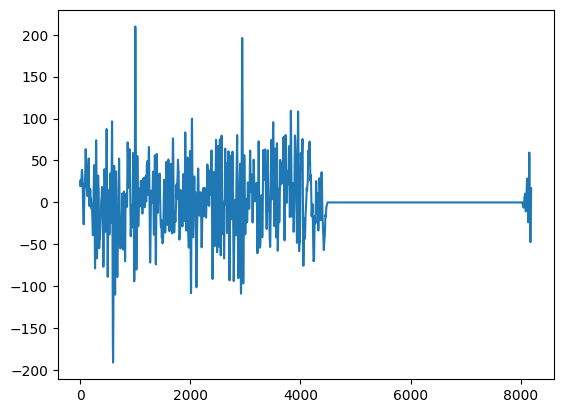

In [133]:
plt.plot(corr)

In [53]:
len(corr)

256

c:\Users\Parv\anaconda3\envs\pytorch_gpu\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Parv\anaconda3\envs\pytorch_gpu\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


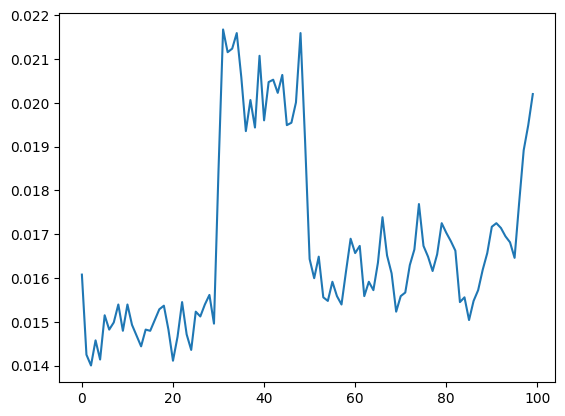

In [49]:
plt.plot(seq_i)

In [40]:
seq_normed[:100]

array([0.0160789 , 0.01424989, 0.01400421, 0.01457748, 0.0141407 ,
       0.01515075, 0.01482316, 0.01498696, 0.01539644, 0.01479587,
       0.01539644, 0.01493236, 0.01468667, 0.01444098, 0.01482316,
       0.01479587, 0.01504155, 0.01528724, 0.01536914, 0.01482316,
       0.0141134 , 0.01465937, 0.01545103, 0.01471397, 0.01435909,
       0.01523264, 0.01512345, 0.01539644, 0.01561483, 0.01495966,
       0.01848118, 0.02167512, 0.02115645, 0.02123835, 0.02159323,
       0.02058318, 0.01935474, 0.0200645 , 0.01943664, 0.02107455,
       0.01960043, 0.02047398, 0.02052858, 0.0202283 , 0.02063778,
       0.01949123, 0.01954583, 0.02000991, 0.02159323, 0.01913635,
       0.01643378, 0.01599701, 0.01648838, 0.01556023, 0.01547833,
       0.01591511, 0.01558753, 0.01539644, 0.0161608 , 0.01689786,
       0.01657028, 0.01673407, 0.01558753, 0.01591511, 0.01572402,
       0.01635189, 0.01738924, 0.01651568, 0.0161062 , 0.01523264,
       0.01558753, 0.01566942, 0.01629729, 0.01665217, 0.01768

In [39]:
seq_i

array([0.0160789 +0.00000000e+00j, 0.01424989-5.20417043e-20j,
       0.01400421-2.08166817e-19j, 0.01457748-1.73472348e-19j,
       0.0141407 +2.08166817e-19j, 0.01515075+2.43797450e-19j,
       0.01482316-3.29964013e-20j, 0.01498696+1.84842133e-19j,
       0.01539644-4.16333634e-19j, 0.01479587+1.35364636e-19j,
       0.01539644-3.77401323e-20j, 0.01493236-3.02876640e-19j,
       0.01468667-2.08166817e-19j, 0.01444098-2.84863695e-19j,
       0.01482316-2.57162859e-19j, 0.01479587-4.73653798e-19j,
       0.01504155+0.00000000e+00j, 0.01528724-1.63687330e-19j,
       0.01536914-7.10870072e-20j, 0.01482316-6.75066159e-20j,
       0.0141134 -4.07857950e-20j, 0.01465937-2.00839816e-19j,
       0.01545103+2.63602701e-19j, 0.01471397+1.38757885e-19j,
       0.01435909+7.39553043e-20j, 0.01523264-1.63937435e-19j,
       0.01512345-3.24132789e-19j, 0.01539644+6.82436355e-20j,
       0.01561483+6.11131875e-21j, 0.01495966-4.23223791e-19j,
       0.01848118+2.59766092e-19j, 0.02167512+3.3121204

### Helixworks based analysis

In [140]:
import pandas as pd

In [136]:
def reverse_complement(dna):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join(complement[base] for base in reversed(dna))

In [162]:
seqs[4]

'GCCTCTTATCCAACACCTTCACCTTACCTACTCAATTCATACTTTCATCC'

In [137]:
# getting rc version of the spacers
spacers = [
'TTGGATAAGAGGCGTTGGGAGTAAA',
'GATTAAGAGGCGTGGATGAAAGTAT',
'GAAGAGTGCGTGTGAGATAGATAGG',
'TGCGGGTAGGTGAAAGTAGGATGTG',
'GTGGAGAAGTGAGTAGGAAAGTAAG',
'GTGGTAGTAAGTAGAAGTGTGTGAG',
'GCGAATGAAGGGTAGTATATAGGAG',
'TTTGTGCGATGGTGGGATGGAAGAA',
'GCGGGGATAAAGGTAGAAAAGGTAA',
'AGGGATGGAGCTGGGTTGTATGTAA',
'ATAGTGTAGTTGGGATGGGCAGAGA'
]

rev_spacers = [reverse_complement(i) for i in spacers]

In [164]:
len(spacers[0])

25

In [163]:
rev_spacers

['TTTACTCCCAACGCCTCTTATCCAA',
 'ATACTTTCATCCACGCCTCTTAATC',
 'CCTATCTATCTCACACGCACTCTTC',
 'CACATCCTACTTTCACCTACCCGCA',
 'CTTACTTTCCTACTCACTTCTCCAC',
 'CTCACACACTTCTACTTACTACCAC',
 'CTCCTATATACTACCCTTCATTCGC',
 'TTCTTCCATCCCACCATCGCACAAA',
 'TTACCTTTTCTACCTTTATCCCCGC',
 'TTACATACAACCCAGCTCCATCCCT',
 'TCTCTGCCCATCCCAACTACACTAT']

In [141]:
library_df = pd.read_csv("data\completed_library.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Parv\AppData\Local\Temp\ipykernel_8940\1094912200.py:1: SyntaxWarning: invalid escape sequence '\c'
  library_df = pd.read_csv("data\completed_library.csv")


In [143]:
seqs = library_df['Sequence']

In [156]:
len(rev_spacers)

11

1 + 8 (per motif type) * 10 (per cycle)

In [199]:
for ptr, seq in enumerate(seqs[:-1]):
    if ptr == 0:
        cycle_position = 0
    else:
        cycle_position = int((ptr - 1) / 8)

    print(seq)
    print(rev_spacers[cycle_position][12:] + "A"*25 + rev_spacers[cycle_position+1][:12])
    print()
    #print(rev_spacers[cycle_position][12:] + "A"*25 + rev_spacers[cycle_position+1][13:])
    """
    for i, j in zip(rev_spacers, spacers):
        if i[12:] in seq:
            print(seq)
            print(i[12:] + "A"*25 + i[:12])
            print(i[:12])
            print(j)
        #if j[12:] in seq:
        #    print(j)
    """

ACTTACCCGCTACTTTCATCACTAATTTACTCCCAAC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAAAACAACATCAATCCTACATCGCCTAATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAAATATACCTCGCCTCATCTCAATCAAATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAATTTCACTTCTTATCCGCCTCACCTAATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAACACCTTCACCTTACCTACTCAATTCATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAACAACCCTCTATCCGCCTCTCCACTAATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAAAACCCATCACTTACCTCTCTTAACAATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAACCATCCATATCATTTTCTCCTTACCATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

GCCTCTTATCCAACCACATCTACCCTTCCACTCTATCAATACTTTCATCC
GCCTCTTATCCAAAAAAAAAAAAAAAAAAAAAAAAAAAATACTTTCATCC

ACGCCTCTTAATCAACAACATCAATCCTACATCGCCTACCTATCTATCTC
ACGCCTCTTAATCAAAAAAAAAAAAAAAAAAAAAA

In [170]:
len(i[:12])

12

In [202]:
_, data = get_data_from_fast5(r"C:\Users\Parv\Doc\HelixWorks\Basecalling\squigulator\slow5tools-v1.1.0\testing.fast5")

In [208]:
spacer_rep = clean_signal(data[0])

In [211]:
spacer_rep

array([-0.34175079,  0.28403577,  0.48928728,  0.37105904,  0.02640637,
       -0.44761543, -0.80212075, -1.18100492, -1.54186915, -1.66940343,
       -1.57556942, -1.42096139, -1.32495915, -1.30378793, -1.37616003,
       -1.42222192, -1.42124795, -1.48539353, -1.66972971, -1.51722605,
       -1.07667668, -0.41428528,  0.41890381,  1.06842258,  1.37912463,
        1.58988803,  1.48291569,  1.06057625,  0.43620947,  0.15886774,
        0.07743136,  0.1466592 ,  0.33694316,  0.43676307,  0.46862106,
        0.50997192,  0.54802493,  0.62588947,  0.62844931,  0.6701101 ,
        0.68620776,  0.75514453,  0.8205466 ,  0.80069564,  0.91978411,
        1.00632196,  1.05646013,  1.04526862,  0.94781742,  0.73917651])

In [215]:
corr = cross_correlation_fft(seq_, spacer_rep)

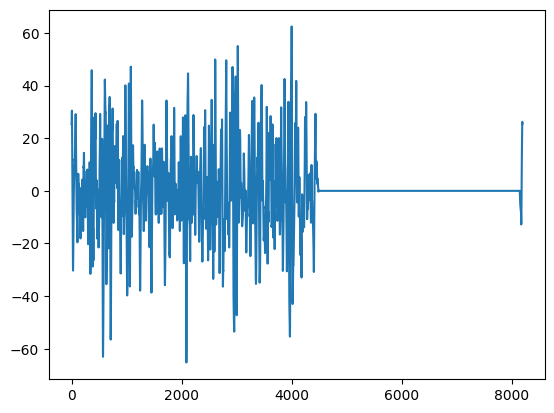

In [214]:
plt.plot(cr)

In [216]:
best_shift = np.argmax(corr)
best_similarity = corr[best_shift]


In [217]:
best_shift

np.int64(3999)